**1 B)**

In [31]:
# Först snygga till filen. 

import pandas as pd

df = pd.read_excel("data/betyg_o_prov_riksnivå.xlsx", sheet_name = "Tabell 1B", skiprows = 6)
df_cleaned = df.drop(index = range(6,29))
df_cleaned

,Unnamed: 0,Genomsnittligt meritvärde beräknat på 16 ämnen,Unnamed: 2,Unnamed: 3,Genomsnittligt meritvärde beräknat på 17 ämnen3,Unnamed: 5,Unnamed: 6,"Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen",Unnamed: 8,Unnamed: 9
0,NaN,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
1,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
2,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
3,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
4,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
5,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28


In [ ]:
# But I want to change the name of the columns for simplicity

df_cleaned = df_cleaned.rename(columns={
    "Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen": "Totalt",
    "Unnamed: 8": "Flickor",
    "Unnamed: 9": "Pojkar"
})

df_cleaned

In [44]:
# Är objects
# df_cleaned.dtypes

# Gör om dom till foats. 

df_totalt = df_cleaned["Totalt"] = pd.to_numeric(df_cleaned["Totalt"], errors='coerce').fillna(0).astype(float)
df_flickor = df_cleaned["Flickor"] = pd.to_numeric(df_cleaned["Flickor"], errors='coerce').fillna(0).astype(float)
df_pojkar = df_cleaned["Pojkar"] = pd.to_numeric(df_cleaned["Pojkar"], errors='coerce').fillna(0).astype(float)

# Check, men raden 0 kommer med, så tar bort dessa. 

df_totalt = df_totalt.drop(index = 0)
df_flickor = df_flickor.drop(index = 0)
df_pojkar = df_pojkar.drop(index = 0)
df_flickor





1    21.7
2    21.4
3    21.9
4    24.2
5    25.5
Name: Flickor, dtype: float64

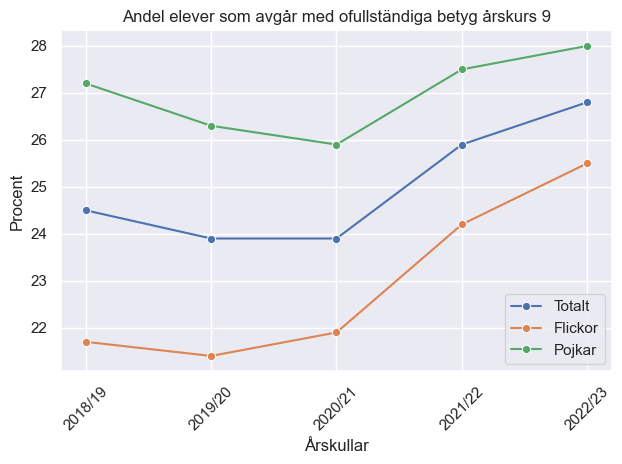

In [ ]:
# Dags att gör en linechart

import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
sns.set_theme(style="darkgrid")

# Plot each DataFrame
sns.lineplot(x=df_totalt.index, y=df_totalt.values, label="Totalt", marker="o") # marker lägger till punkt
sns.lineplot(x=df_flickor.index, y=df_flickor.values, label="Flickor", marker="o")
sns.lineplot(x=df_pojkar.index, y=df_pojkar.values, label="Pojkar", marker="o")

# Customize the plot
plt.title("Andel elever som avgår med ofullständiga betyg årskurs 9")
plt.xlabel("Årskullar")
plt.ylabel("Procent")
plt.xticks(ticks=df_pojkar.index, labels=["2018/19", "2019/20", "2020/21", "2021/22", "2022/23"], rotation=45)
plt.tight_layout()
plt.show()


** 1 B) Validate that the id is integer, name is string, is_active is boolean and age is integer. It should return true if valid and false if not valid.**

In [87]:
validate = {
    "id": 2,
    "name": "string",
    "is_active": True,
    "age": 4,
}

# Define expected data types for each key
expected_types = {
    "id": int,
    "name": str,
    "is_active": bool,
    "age": bool,
}

# Validate the data types
for key, values in validate.items():
    expected_type = expected_types.get(key)  # Get the expected type for the current key
    
    if expected_type:
        if isinstance(values, expected_type): 
            print(f"{key} is valid ({type(values).__name__})")
        else:
            print(f"{key} is invalid: Expected {expected_type.__name__}, but got {type(values).__name__}")
    else:
        print(f"No expected type defined for {key}")

    


id is valid (int)
name is valid (str)
is_active is valid (bool)
age is invalid: Expected bool, but got int


**1 c )** Examine other variable(s) of your choice and check how they affect the students grade. For example you could choose "föräldrarnas utbildningsbakgrund", parents grades.

In [105]:
df2 = pd.read_excel("data/betyg_o_prov_riksnivå.xlsx", sheet_name = "Tabell 1B", skiprows = 6)
df_cleaned2 = df2.drop(index = range(23))
# df_cleaned2 = df.drop(index = range(22))
# df_cleaned2 = df.drop(index = range(26, 28))
df_cleaned2 = df_cleaned2.drop(index = range(26, 29))
df_cleaned2

# Rensad 

,Unnamed: 0,Genomsnittligt meritvärde beräknat på 16 ämnen,Unnamed: 2,Unnamed: 3,Genomsnittligt meritvärde beräknat på 17 ämnen3,Unnamed: 5,Unnamed: 6,"Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen",Unnamed: 8,Unnamed: 9
23,Förgymnasial utbildning,163.8,172.2,155.8,166.8,175.6,158.3,63.5,61.5,65.3
24,Gymnasial utbildning,197.4,207.2,188.2,203.2,213.6,193.3,37.4,35.2,39.5
25,Eftergymnasial utbildning,239.1,247.9,230.7,248.6,258.1,239.6,16.8,16.1,17.5


In [120]:
# I want to change the name of the columns for simplicity

df_föräldrar = df_cleaned2.rename(columns={
    "Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen": "Totalt",
    "Unnamed: 8": "Flickor",
    "Unnamed: 9": "Pojkar"
})

df_föräldrar

,Unnamed: 0,Genomsnittligt meritvärde beräknat på 16 ämnen,Unnamed: 2,Unnamed: 3,Genomsnittligt meritvärde beräknat på 17 ämnen3,Unnamed: 5,Unnamed: 6,Totalt,Flickor,Pojkar
23,Förgymnasial utbildning,163.8,172.2,155.8,166.8,175.6,158.3,63.5,61.5,65.3
24,Gymnasial utbildning,197.4,207.2,188.2,203.2,213.6,193.3,37.4,35.2,39.5
25,Eftergymnasial utbildning,239.1,247.9,230.7,248.6,258.1,239.6,16.8,16.1,17.5


In [130]:

# df_föräldrar.dtypes
# Är objects
# Gör om dom till foats. 

df_totalt_f = df_föräldrar["Totalt"] = pd.to_numeric(df_föräldrar["Totalt"], errors='coerce').fillna(0).astype(float)
df_flickor_f = df_föräldrar["Flickor"] = pd.to_numeric(df_föräldrar["Flickor"], errors='coerce').fillna(0).astype(float)
df_pojkar_f = df_föräldrar["Pojkar"] = pd.to_numeric(df_föräldrar["Pojkar"], errors='coerce').fillna(0).astype(float)


df_totalt_f





23    63.5
24    37.4
25    16.8
Name: Totalt, dtype: float64

In [131]:
df_föräldrar

,Unnamed: 0,Genomsnittligt meritvärde beräknat på 16 ämnen,Unnamed: 2,Unnamed: 3,Genomsnittligt meritvärde beräknat på 17 ämnen3,Unnamed: 5,Unnamed: 6,Totalt,Flickor,Pojkar
23,Förgymnasial utbildning,163.8,172.2,155.8,166.8,175.6,158.3,63.5,61.5,65.3
24,Gymnasial utbildning,197.4,207.2,188.2,203.2,213.6,193.3,37.4,35.2,39.5
25,Eftergymnasial utbildning,239.1,247.9,230.7,248.6,258.1,239.6,16.8,16.1,17.5


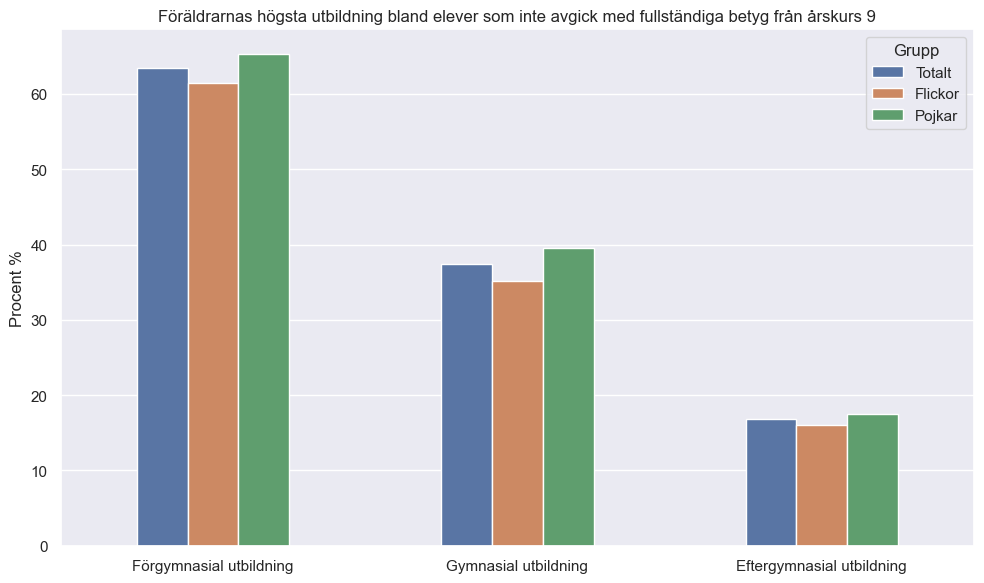

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns for clarity
df_föräldrar.rename(columns={"Unnamed: 0": "Utbildningsnivå"}, inplace=True)

# Reshape the DataFrame for plotting
df_melted = df_föräldrar.melt(
    id_vars=["Utbildningsnivå"], 
    value_vars=["Totalt", "Flickor", "Pojkar"], 
    var_name="Grupp", 
    value_name="Poäng"
)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x="Utbildningsnivå", y="Poäng", hue="Grupp", width = 0.50)
ax.set_title("Föräldrarnas högsta utbildning bland elever som inte avgick med fullständiga betyg från årskurs 9")
ax.set_ylabel("Procent %")
ax.set_xlabel("")
# plt.xticks(rotation=30)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()







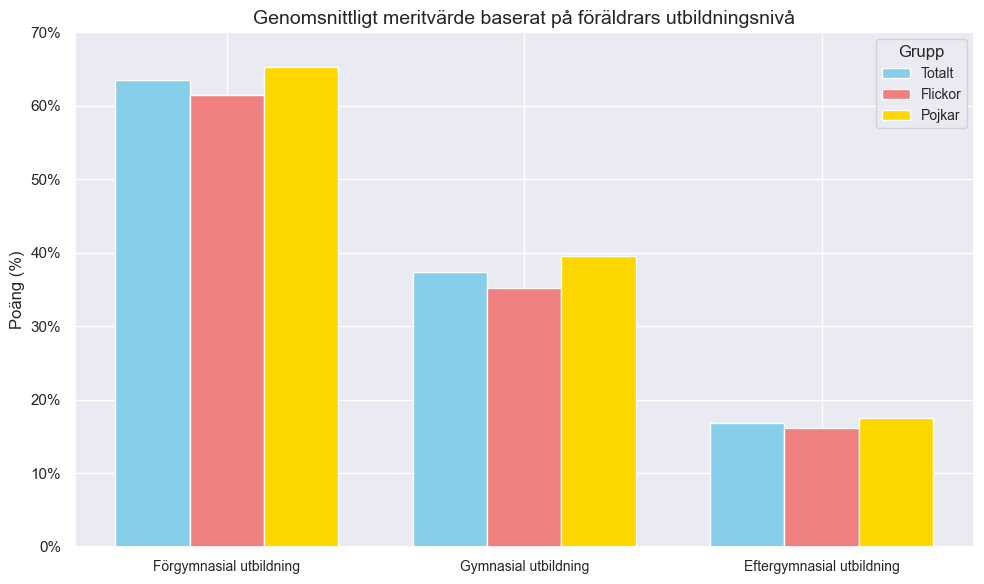

In [144]:
import matplotlib.pyplot as plt
import numpy as np


# Grouped bar chart setup
x = np.arange(len(df_föräldrar["Utbildningsnivå"]))  # x locations for the groups
width = 0.25  # Width of the bars

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width, df_föräldrar["Totalt"], width, label="Totalt", color="skyblue")
ax.bar(x, df_föräldrar["Flickor"], width, label="Flickor", color="lightcoral")
ax.bar(x + width, df_föräldrar["Pojkar"], width, label="Pojkar", color="gold")

# Customizing the chart
ax.set_title("Genomsnittligt meritvärde baserat på föräldrars utbildningsnivå", fontsize=14)
ax.set_ylabel("Poäng (%)", fontsize=12)
ax.set_xticks(x)  # Position the ticks at the group centers
ax.set_xticklabels(df_föräldrar["Utbildningsnivå"], fontsize=10)
ax.legend(title="Grupp", fontsize=10)

# Add percentage signs to the y-axis
ax.set_yticks(np.arange(0, 80, 10))  # Set appropriate y-axis limits and intervals
ax.set_yticklabels([f"{tick}%" for tick in np.arange(0, 80, 10)])

# Tight layout for clean visualization
plt.tight_layout()

# Show the plot
plt.show()
